# Let's do some data analysis and machine learnings

## We will first use the "iris" dataset

In [17]:
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Pandas dataframe

We convert the dataset to a pandas dataframe.

In [3]:
import pandas as pd
df_iris = pd.DataFrame(iris.data)
df_iris.columns = iris.feature_names
df_iris['target'] = [iris.target_names[xx] for xx in iris.target]
print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       se

# Pandas dataframe

We now view the data in a scatter plot matrix format

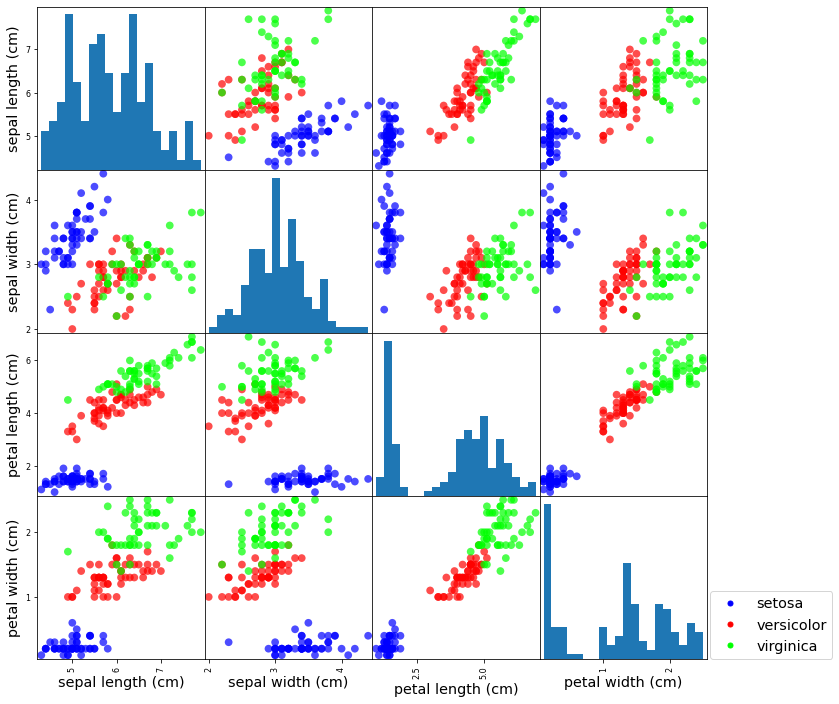

In [4]:
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 12),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)
pd.plotting.scatter_matrix(df_iris.drop(['target'],axis=1), c=iris.target, marker='o', alpha=0.7, 
                                hist_kwds={'bins': 20}, s=60, cmap=plt.cm.brg)
handles = [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker=".", 
                    markersize=10)[0] for i in range(3)]
plt.legend(handles, list(iris.target_names), loc=(1.02,0))
plt.show()

# Supervised Learning

- Learn from labeled data!
- We first partition the dataset into training and testing samples: 80/20 split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_iris.drop(['target'],axis=1), df_iris['target'], test_size=0.2)

# Single nearest neighbor classifier

Let's try a single nearest nieghbor classifier first.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# How did it do?

We infer the labels of the testing data and compute some figures of merit.

In [24]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(y_test, pred,
                            target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.86      0.92         7
   virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.95      0.95        30
weighted avg       0.97      0.97      0.97        30



# Figures of Merit (FoM)

For each class g in testing dataset $\mathcal{D} = \bigcup_{g \in G}\mathcal{D}_g$:
- $\mathrm{TP}_g$ is "true positive": if labeled g and is g
- $\mathrm{TN}_g$ is "true negative": if labeled NOT g and is NOT g
- $\mathrm{FP}_g$ is "false positive": if labeled g but is NOT g
- $\mathrm{FN}_g$ is "false negative": if labeled NOT g but is g

## Precision, Recall and f1-score

*Precision*: "Of those labeled g, how many are actually g?"
$$\textrm{Pre(g)} = \frac{\mathrm{TP}_g}{\mathrm{TP}_g+\mathrm{FP}_g}$$

*Recall*: "How many of the g observations are labeled g?"
$$\textrm{Rec(g)} = \frac{\mathrm{TP}_g}{\mathrm{TP}_g+\mathrm{FN}_g}$$

*f1-score*: Harmonic mean of precision and recall
$$f(g) = \frac{\textrm{Pre(g)}\textrm{Rec(g)}}{\frac{\textrm{Pre(g)}+\textrm{Rec(g)}}{2}}$$


## Accuracy and macro-/weighted-averaged FoM  

*Accuracy*: "What proportion of the labels are correct?"
$$\textrm{Acc} = \frac{1}{|\mathcal{D}|}\sum_g\mathrm{TP}_g$$

*Macro-averaged FoM*:
$$\textrm{MAFoM} = \frac{1}{|G|}\sum_ g \textrm{FoM(g)}$$

*Weighted-averaged FoM*:
$$\textrm{WAFoM} = \frac{1}{|\mathcal{D}|}\sum_ g |\mathcal{D}_g|\textrm{FoM(g)}$$

# Confusion Tables

Record all predicted labels against ground truth.

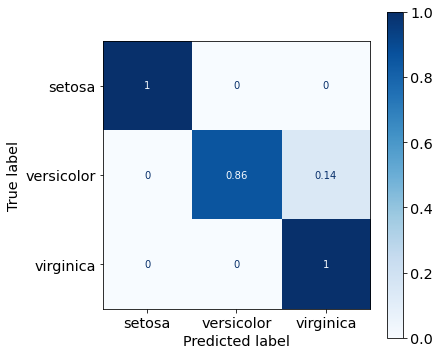

In [25]:
from sklearn.metrics import plot_confusion_matrix
params = {'legend.fontsize': 'x-large','figure.figsize': (6, 6),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plot_confusion_matrix(clf, X_test, y_test,normalize='true',cmap=plt.cm.Blues)
plt.show()

# Feature selection

From our scatter plot matrix, it looks like feature dimensions 3 and 4 provide good separability:

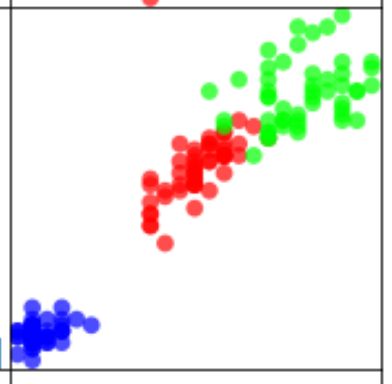

Let's just use those two dimensions to classify and see how well we do.

In [12]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train.iloc[:,2:4],y_train)
pred = clf.predict(X_test.iloc[:,2:4])
print(classification_report(y_test, pred,
                            target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.83      0.91      0.87        11
   virginica       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.90      0.90      0.90        30



# Decision boundaries
Now that we are working in two-dimensions, we can visualize the decision boundaries.

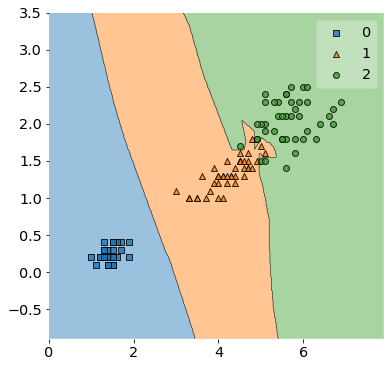

In [26]:
from mlxtend.plotting import plot_decision_regions
# The following is needed since mlxtend doesn't understand Pandas daataframes
X_trainNP = X_train.iloc[:,2:4].to_numpy()
clf = KNeighborsClassifier(n_neighbors=1)
y_trainNP = y_train.astype('category').cat.codes.to_numpy()
clf.fit(X_trainNP,y_trainNP)
plot_decision_regions(X_trainNP,y_trainNP, clf=clf)

# K nearest neighbor classifier

Let's try using several neighbors now: ask several neighbors for help with inference in our two-dimensional feature space.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      0.91      0.95        11
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



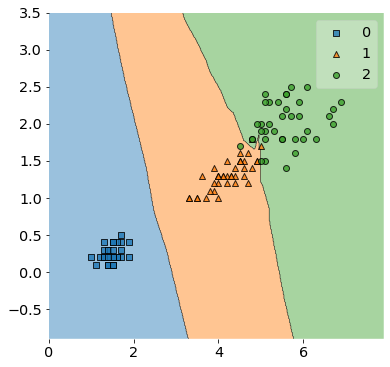

In [14]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred,
                            target_names=iris.target_names))

clf.fit(X_trainNP,y_trainNP)
plot_decision_regions(X_trainNP,y_trainNP, clf=clf)

# Feature selection

From our scatter plot matrix, it looks like feature dimensions 1 and 2 provide poor separability:

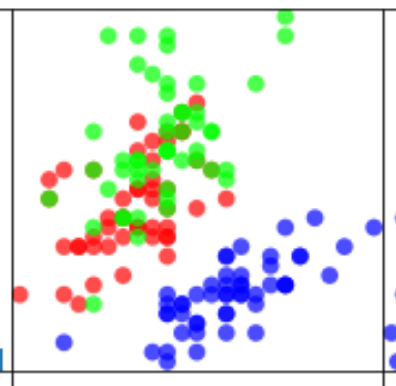

Let's just use those two dimensions to classify and see how well we do.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.56      0.71      0.63         7
   virginica       0.67      0.50      0.57         8

    accuracy                           0.80        30
   macro avg       0.74      0.74      0.73        30
weighted avg       0.81      0.80      0.80        30



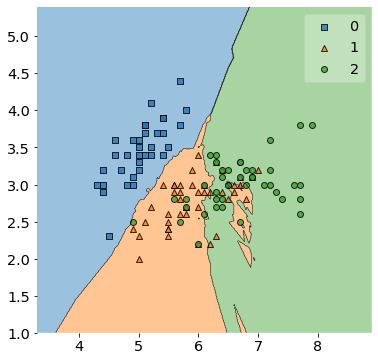

In [29]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train.iloc[:,0:2],y_train)
pred = clf.predict(X_test.iloc[:,0:2])
print(classification_report(y_test, pred,
                            target_names=iris.target_names))
X_trainNP = X_train.iloc[:,0:2].to_numpy()
clf.fit(X_trainNP,y_trainNP)
plot_decision_regions(X_trainNP,y_trainNP, clf=clf)

## Generalization, Overfitting, and Underfitting

* If a model is able to make accurate predictions on unseen data: 
    * it is able to **generalize** from the training set to the test set.
* Building a model that is too complex for the amount of information in the data is called overfitting.
* This refers to the complexity of the decision boundary, **NOT** computational complexity.

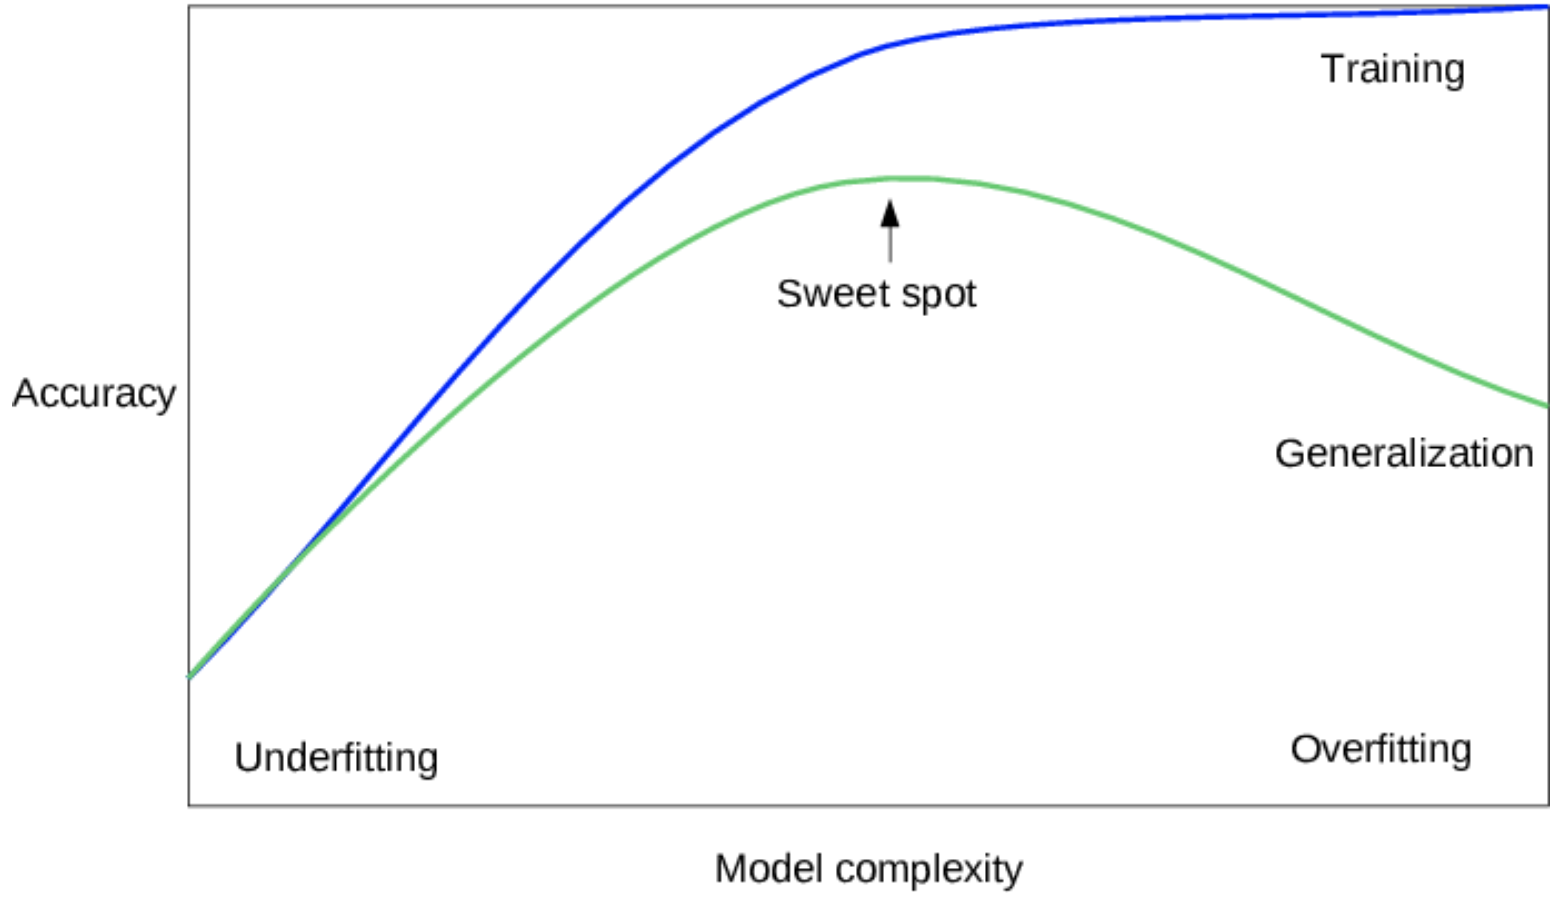

# Training and testing accuracy as function of K

Let's plot the accurcy as a function of K using all four features

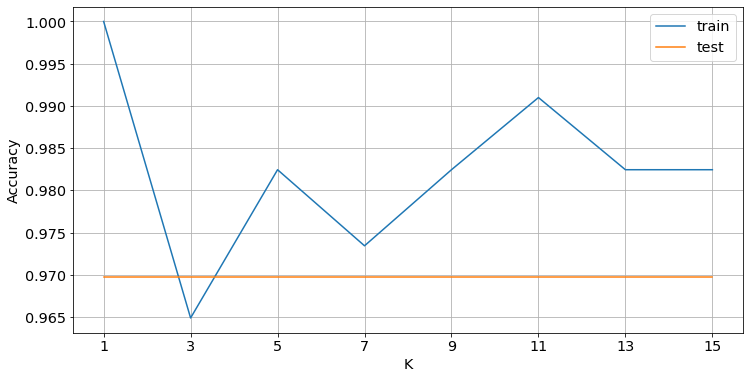

In [16]:
from sklearn.metrics import balanced_accuracy_score
acc_train = []; acc_test = []
KK = range(1,16,2)
for kk in KK:
    clf = KNeighborsClassifier(n_neighbors=kk)
    clf.fit(X_train,y_train)
    acc_train.append(balanced_accuracy_score(y_train,clf.predict(X_train)))
    acc_test.append(balanced_accuracy_score(y_test, clf.predict(X_test)))
    
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 6),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)
fig, ax = plt.subplots()
plt.plot(KK,acc_train,label='train')
plt.plot(KK,acc_test,label='test')
plt.xticks(KK)
plt.xlabel('K'); plt.ylabel('Accuracy')
plt.legend(); plt.grid(); plt.show()

- Overfitting happens for small values of k.
- Complexity decreases from left to right (opposite of the theoretical plot)
- Question: Why is the training accuracy for k=1 perfect?